In [3]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv("../Data/Heart.csv",index_col = 0)

df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


<AxesSubplot:xlabel='AHD', ylabel='count'>

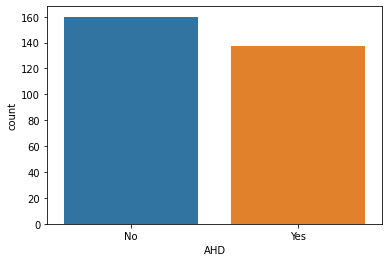

In [6]:
df.dropna(inplace=True)

sns.countplot( data = df, x="AHD")

In [12]:
from sklearn.model_selection import train_test_split

df_dummies = pd.get_dummies(df,drop_first=True)

X,y = df_dummies.drop("AHD_Yes",axis=1), df_dummies["AHD_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

X_train.shape , X_test.shape

((237, 16), (60, 16))

# Random forest classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

y_pred = model_rf.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1], dtype=uint8)

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [50,100,200,300],
                "criterion":["gini","entropy"],
                "max_features":["auto","sqrt","log2"]
                }

clf = GridSearchCV(RandomForestClassifier(),param_grid= param_grid, cv = 4, verbose=1, scoring = "recall")

clf.fit(X_train,y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='recall', verbose=1)

In [17]:
clf.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}

# Evaluation

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        36
           1       0.80      0.83      0.82        24

    accuracy                           0.85        60
   macro avg       0.84      0.85      0.84        60
weighted avg       0.85      0.85      0.85        60



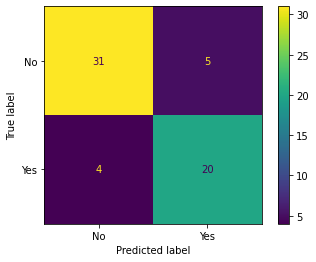

In [23]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay 

y_pred_tuned = clf.predict(X_test) 

print(classification_report(y_test,y_pred_tuned))
cm = confusion_matrix(y_test, y_pred_tuned)
ConfusionMatrixDisplay(cm,display_labels =["No","Yes"]).plot()



In [22]:
model_rf.feature_importances_ , model_rf.feature_importances_.sum()

(array([0.09431661, 0.02833568, 0.07957973, 0.09446035, 0.01108669,
        0.02128035, 0.12397276, 0.06377653, 0.11237455, 0.03369231,
        0.1424887 , 0.02956419, 0.012563  , 0.01501584, 0.07923261,
        0.05826009]),
 1.0)

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

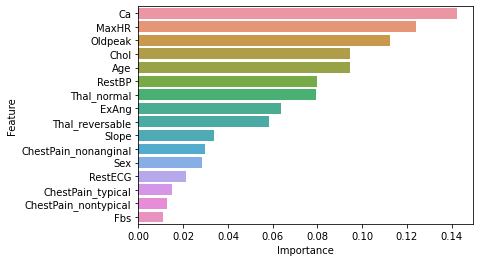

In [25]:
feature_importance = pd.DataFrame([X.columns, model_rf.feature_importances_]).T

feature_importance.columns = ["Feature","Importance"]

feature_importance.sort_values(by="Importance",ascending = False, inplace=True)

sns.barplot(data = feature_importance, y = "Feature", x = "Importance")